<a href="https://colab.research.google.com/github/Celsius1313/AdvancedAnalyticsML01/blob/main/ML_Project_Loan_Prediction_Celsio_Cosme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
import pandas as pd                                                                                     # Dataset manipulations
import numpy as np                                                                                      # Numbers Dataset Manipulations
import matplotlib.pyplot as plt                                                                         # Visual Ploting
import seaborn as sns                                                                                   # Statistical Plots
from sklearn.model_selection import train_test_split, GridSearchCV                                      # Train and Test selection, Pre and Post Pruning
from sklearn.tree import DecisionTreeClassifier, plot_tree                                              # Model Selection, Ploting the tree
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score   # Evaluation Metrics

## Loading the dataset

In [ ]:
data = pd.read_csv(r"C:\Users\P4773\Documents\Desktop_Folder_CelsioCosme_Work\McCOMBS UNIVERSITY OF TEXAS -- PGP - AIML\HANDS-ON PROJECTS\MACHINE LEARNING PROJECT\PERSONAL LOAN CAMPAIGN - PREDICTION\Loan_Modelling.csv")
df = data.copy()
df

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Data Overview

* Observations
* Sanity checks

In [ ]:
df[::1000]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1000,1001,59,35,8,92691,4,0.7,1,91,0,1,0,0,0
2000,2001,28,2,22,95670,1,0.1,2,0,0,0,0,1,0
3000,3001,40,14,164,94720,1,4.3,2,0,1,0,0,0,0
4000,4001,62,37,93,93003,3,3.0,3,0,1,0,1,1,1


In [ ]:
df.head(7)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0


In [ ]:
df.tail(7)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


In [ ]:
print("The dataset have ", df.shape[0], " rows and ", df.shape[1], " columns.", sep="")

The dataset have 5000 rows and 14 columns.


#### **Observations**
- The Dataset have:
    * 5.000 rows;
    * 14 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### **Observations:**
* We have 2 data types: **int64** and **float64**
* Were **13 columns** are **int64** type and **1 column** is **float64** type.

In [ ]:
print("***** Checking 'Null' values *****", df.isnull().sum(), sep="\n")
print("\n")
print("***** Checking 'NA' values *****", df.isna().sum(), sep="\n")

***** Checking 'Null' values *****
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


***** Checking 'NA' values *****
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


#### **Observations:**
* We have no **'NA'** ou **'NULL'** values in the dataset, we
can consider as a clean dataset

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### **Observations:**
We have a dataset with a good distribuition, beside on that, we need to consider that we can have Outliers for **Income** and  **Mortgage** features, a high average usage of the credits cards (**CCAvg**), and we identify that we have negative numbers in **Experience** feature and that isn't *True*.

In [ ]:
df[df["Experience"] < 0].head(15)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [ ]:
print("'Experience' feature before treatment:\n", df["Experience"].sort_values(ascending=True).unique(), sep="") # Here, we are checking how the values inside "Experience" are populated

'Experience' feature before treatment:
[-3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


In [ ]:
df["Experience"] = df["Experience"].apply(lambda x: x*-1 if x < 0 else x) # Here, we are making the data treatment inside "Experience"
print("'Experience' feature after treatment:\n", df["Experience"].sort_values(ascending=True).unique(), sep="") # Checking how the values inside "Experience" after treatment


'Experience' feature after treatment:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]


#### **Observations:**
After checking the data summary with **.describe()**, we found some invalid data in "Experience" variable that we have to transform as the code shows above.

In [ ]:
print(df.columns.to_list(), end="\n") # Checking the columns that we going to turn in categorical variables
categorical_cols = ["ZIPCode", "Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
df[categorical_cols]=df[categorical_cols].astype(str)
print("\n\n ***** Dataset after columns conversion ***** \n")
print(df.info(), sep="")


['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


 ***** Dataset after columns conversion ***** 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   object 
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   object 
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   object 
 10  Securities_Account  5000 non-null   object 
 11  CD_Account          5000 non-nu

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### **Uni and Bivariate Analysis**

Numerical columns to consider in 'histplot': ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Total: 6



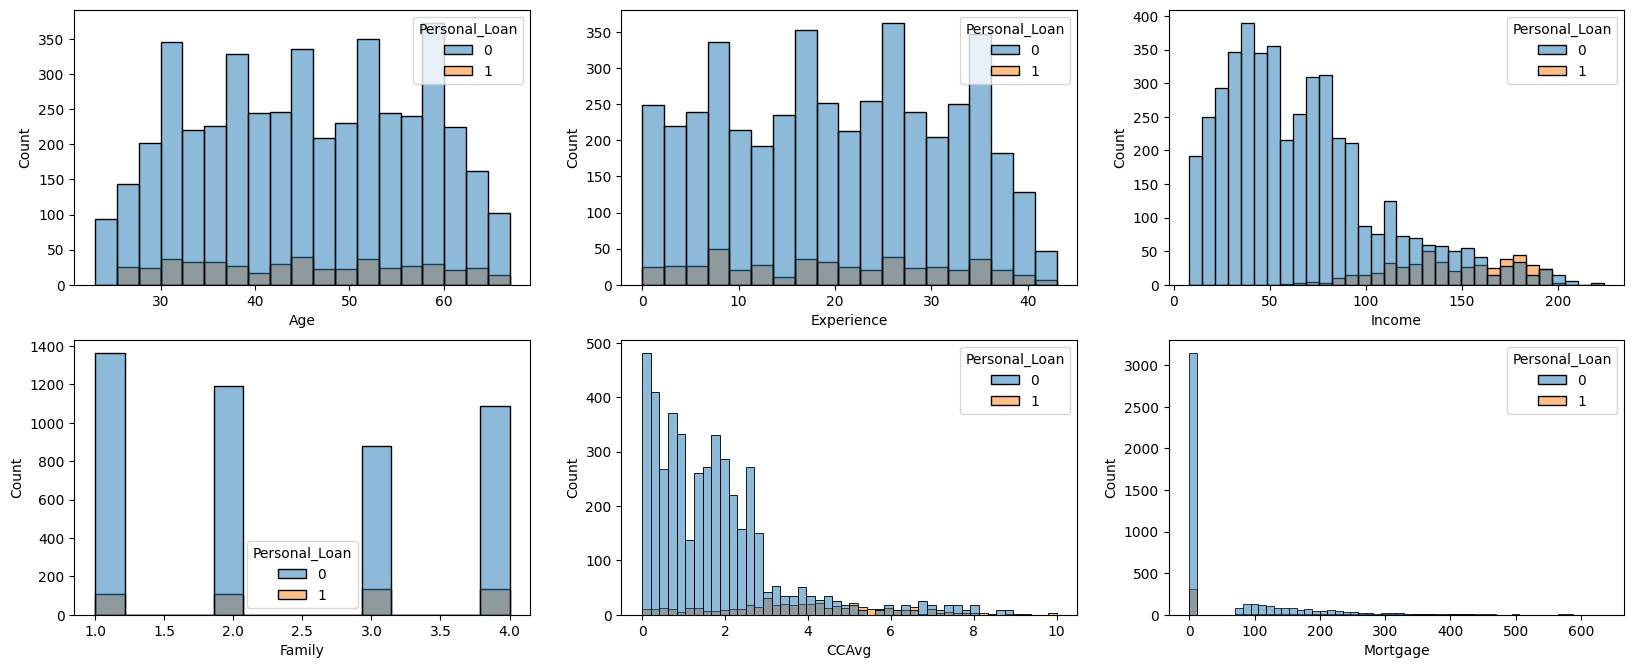

In [ ]:
numerical_columns = df.select_dtypes(exclude="object").columns.to_list()
print("Numerical columns to consider in 'histplot': ", numerical_columns[1:], "\nTotal: ", len(numerical_columns[1:]), sep="", end="\n\n")

plt.figure(figsize=(20,25))
for index, column in enumerate(numerical_columns[1:]):
    plt.subplot(6, 3, index+1)
    sns.histplot(df, x=column, hue="Personal_Loan");

In [ ]:
df[df["Personal_Loan"] =='1']

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


#### **Observations:**
For the countinuos variables related to the target variable **Personal Loan**, we can note relenvate insight that the highest the annual income the better is the possiblity of a Loan purchase.

Numerical columns to consider in 'boxplot': ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Total: 6



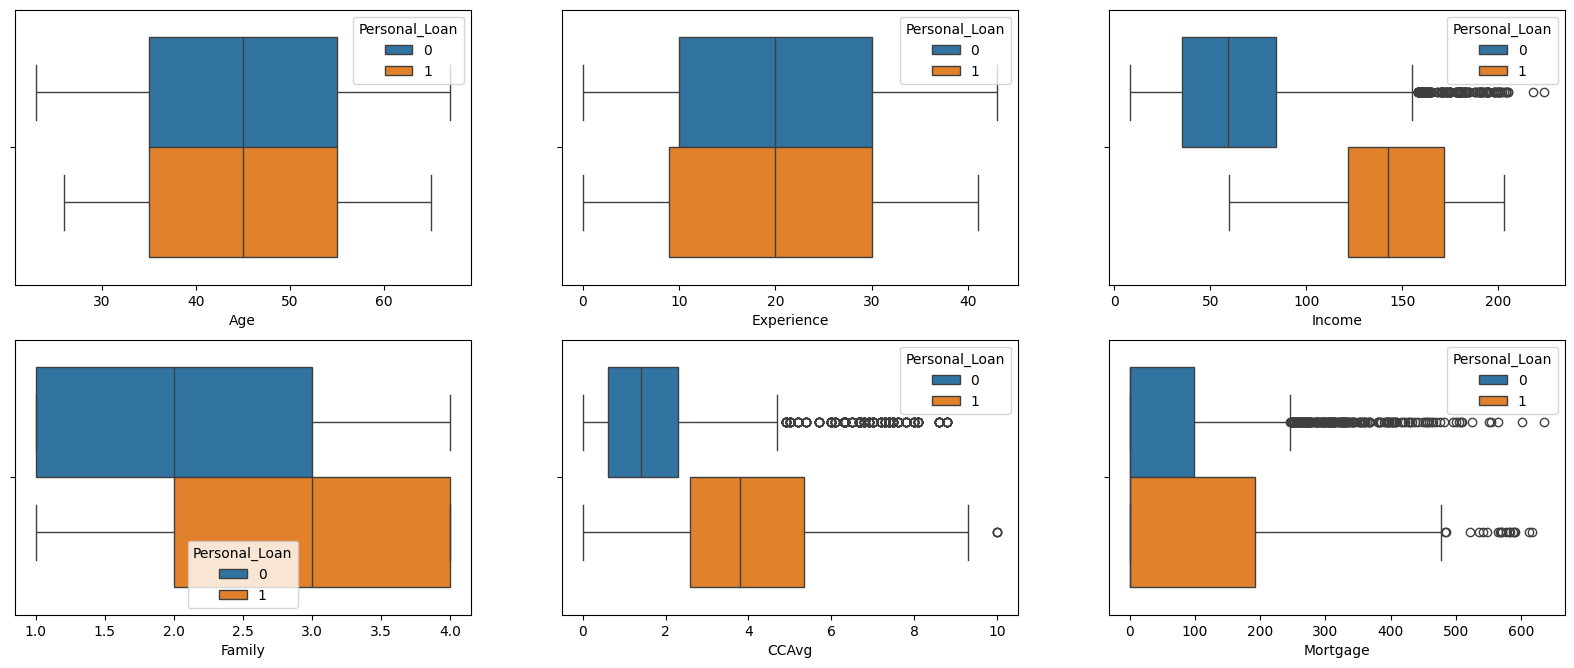

In [ ]:
numerical_columns = df.select_dtypes(exclude="object").columns.to_list()
print("Numerical columns to consider in 'boxplot': ", numerical_columns[1:], "\nTotal: ", len(numerical_columns[1:]), sep="", end="\n\n")

plt.figure(figsize=(20,25))
for index, column in enumerate(numerical_columns[1:]):
    plt.subplot(6, 3, index+1)
    sns.boxplot(df, x=column, hue="Personal_Loan");

#### **Observations:**
- Here with the boxplots we can note that people who have a **Personal Loan** the majority have:
    - A family with size equal or greater than 3;
    - Monthly average for credit card usage (CCAvg) is greater than 3.6K dollars;
    - The annual Income is greater than 135K dollars.

Non-numerical columns to consider in 'countplot': ['Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']
Total: 6



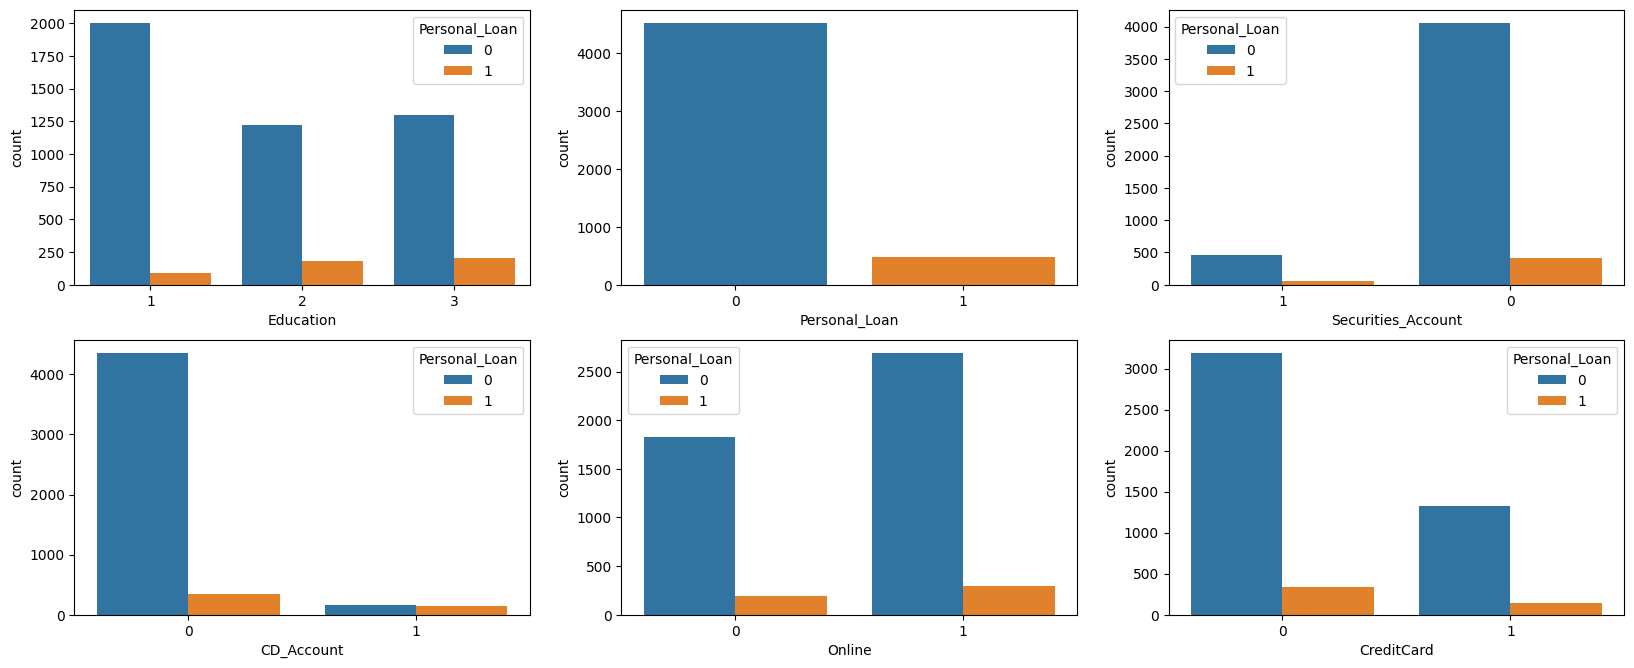

In [ ]:
print("Non-numerical columns to consider in 'countplot': ", categorical_cols[1:], "\nTotal: ", len(categorical_cols[1:]), sep="", end="\n\n")

plt.figure(figsize=(20,25))
for index, column in enumerate(categorical_cols[1:]):
    plt.subplot(6, 3, index+1)
    sns.countplot(df, x=column, hue="Personal_Loan")


#### **Observations:**
- For this visualizations, we can extract the following insights for those who have a **Personal Loan**:
    - They prefered to a internet bank app;
    - They mostly have a Professional/Advanced education;
    - They don't have a credit card in others Banks.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

### *1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?*

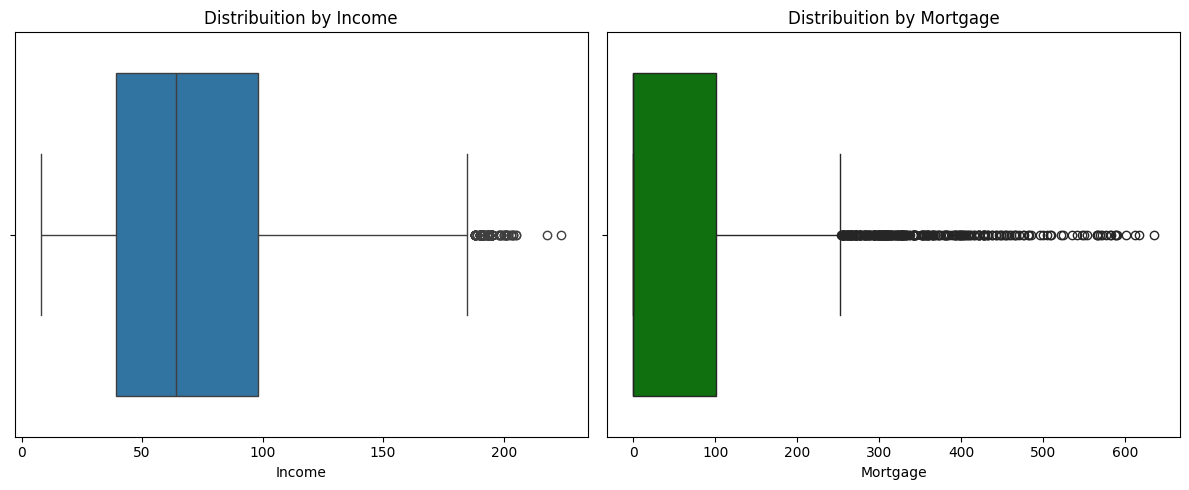

In [ ]:
# Our objective is plot more than one visual in same label.
# Here we going to configure in subplots: 1 for the number of row and 2 for the number of columns, we going to present a plot in a side of other.
# axes variable goint to represent the number of columns.

fig, axes = plt.subplots(1,2, figsize=(12,5))
sns.boxplot(df, x="Income", ax=axes[0])
axes[0].set_title("Distribuition by Income")
sns.boxplot(df, x="Mortgage", color="green", ax=axes[1])
axes[1].set_title("Distribuition by Mortgage")
plt.tight_layout();


#### **Observations:**
For **Mortgage**, we have a lot of Outliers Customers with a high value for their house mortgage, that fact needs to be analyzed very carefully, because most of the Custormers have a annual **Income** lower than the Mortgage.

### *2. How many customers have credit cards?*

In [ ]:
# We going to count total of Customers with a Credit Card in others Banks
df[df["CreditCard"] == "1"].groupby(["CreditCard"])[["ID"]].count().T

CreditCard,0
ID,3530


#### **Observations:**
We have 1.470 Customers with a credit card in others Banks, excluding the **AllLife Bank**

### *3. What are the attributes that have a strong correlation with the target attribute (personal loan)?*

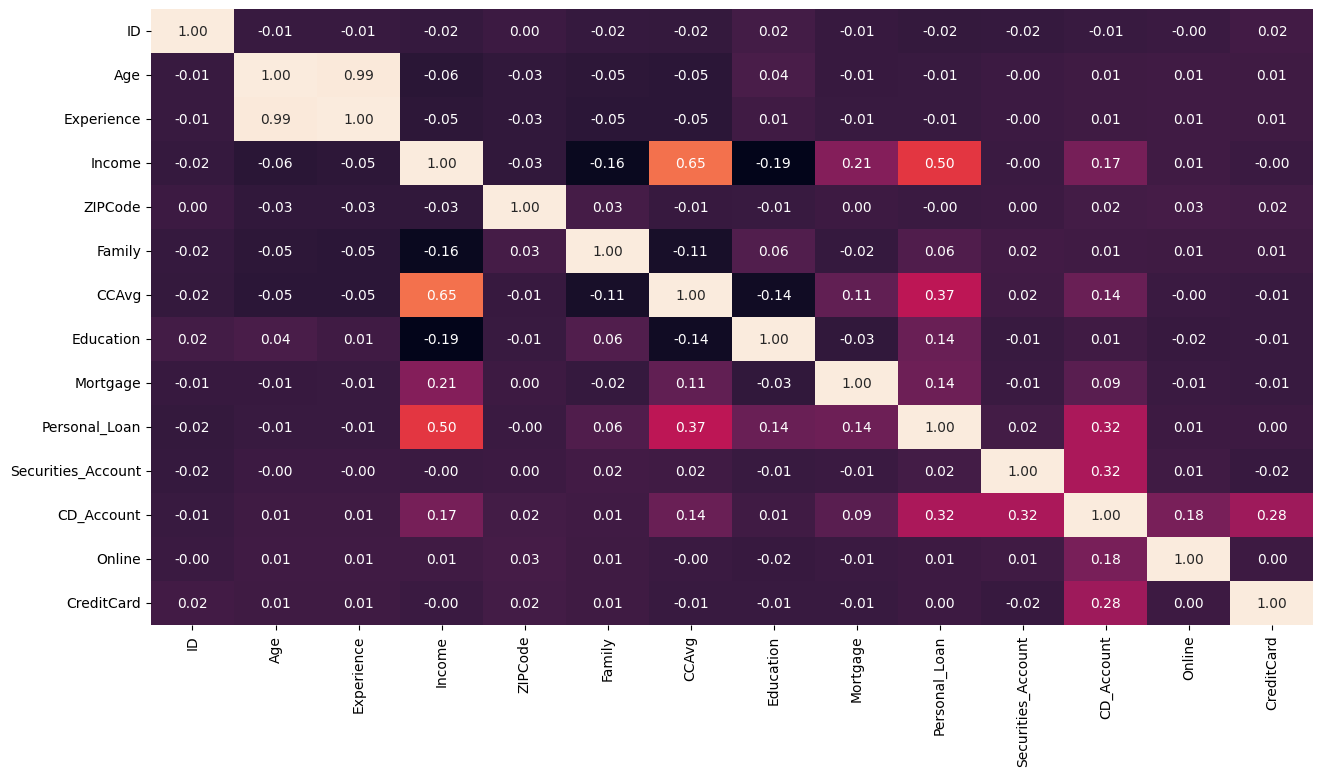

In [ ]:
plt.figure(figsize=(15,8))
df_corr_plotted = sns.heatmap(df.corr(), annot=True, cbar=False, fmt=".2f")
df_corr_plotted;

The heatmap plot show us a strong positive correlation between **Experience** and **Age** (0.99), **CCAvg** and **Income** (0.65), **Personal Loan** and **Income** (0.50), but some this correlations can not affect the target variable prediction.

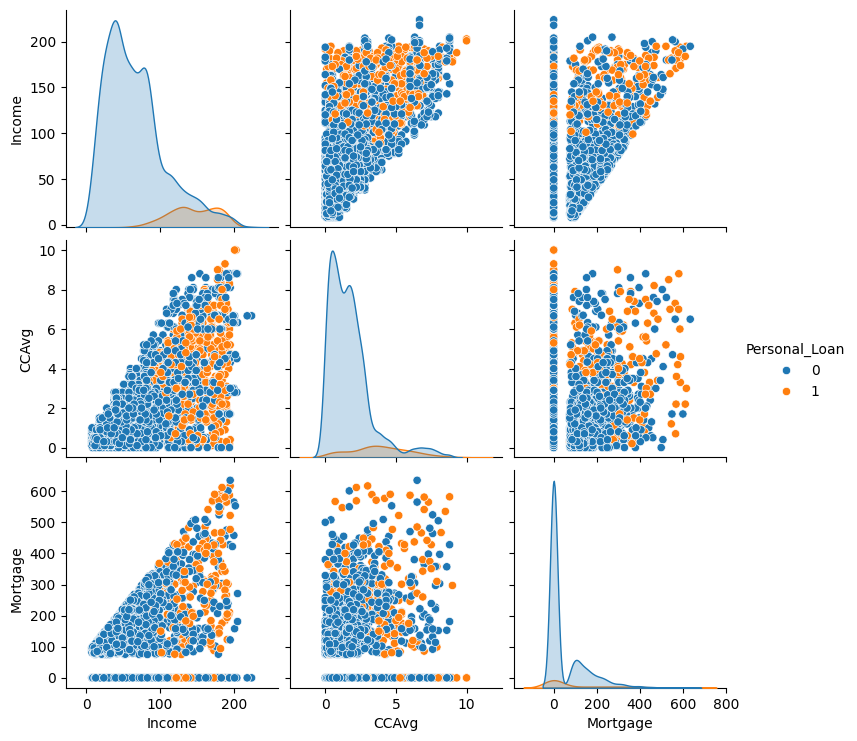

In [ ]:
sns.pairplot(df[["Income", "CCAvg", "Mortgage", "Personal_Loan"]], hue="Personal_Loan");

On this pairplot we can understand more between the variables correlations, and we can conclude that people with a annual income higher than 100K dollars have more chance of do a **Personal Loan**.

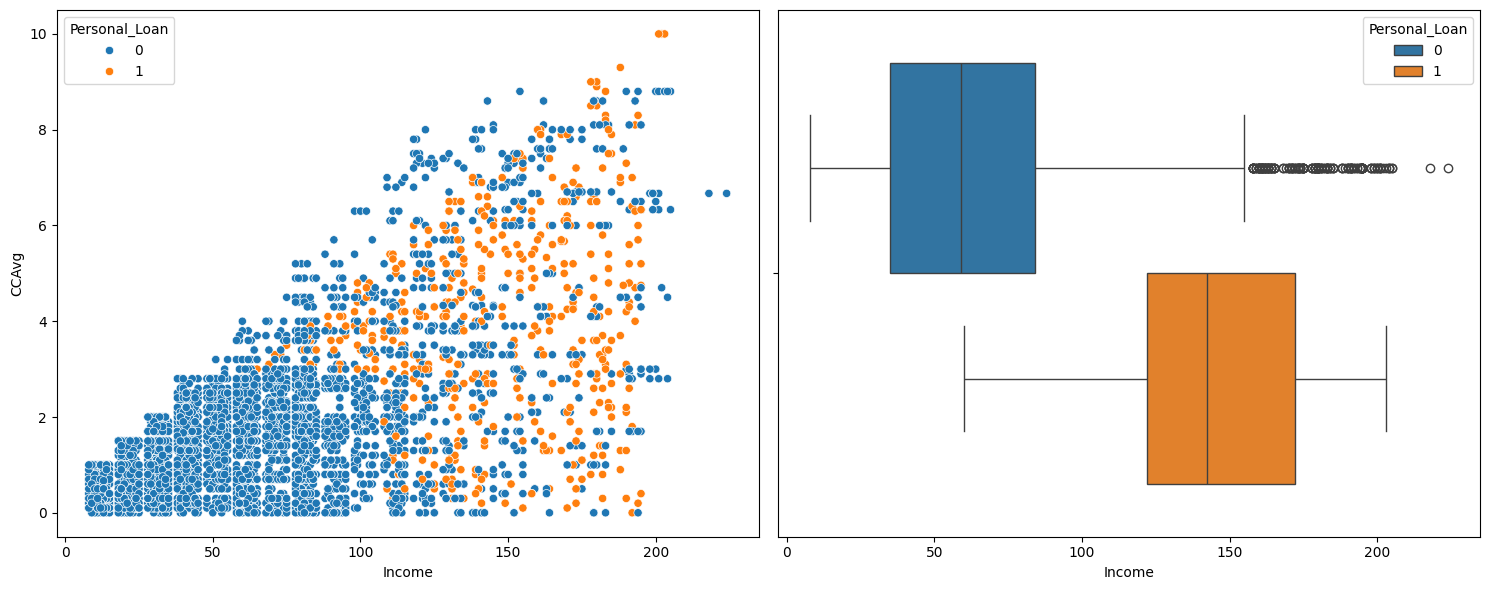

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.scatterplot(df, x="Income", y="CCAvg",  hue="Personal_Loan", ax=axes[0])
sns.boxplot(df, x="Income", hue="Personal_Loan", ax=axes[1])
plt.tight_layout();

Here we can confirm our suspects about a independent variable that can be used to predict the target variable (**Personal Loan**), at least **75%** of the people that have a personal loan, their annual income is **160K to 170K** dollars.

#### **Observations:**
- The attributes that have a strong (positive) correlation with **Personal Loan** is:
1. Income with a 0.50 strengh of positive correlation;
2. CCAvg (The average of spending money used in a Credit Card) with a 0.37 strengh of positive correlation.

### *4. How does a customer's interest in purchasing a loan vary with their age?*

#### **Observations:**
Based on **Age**, the interest of purchasing a Loan isn't irrelevant, as show the plot below but people who have a Loan the is between 25 to 65 years old.

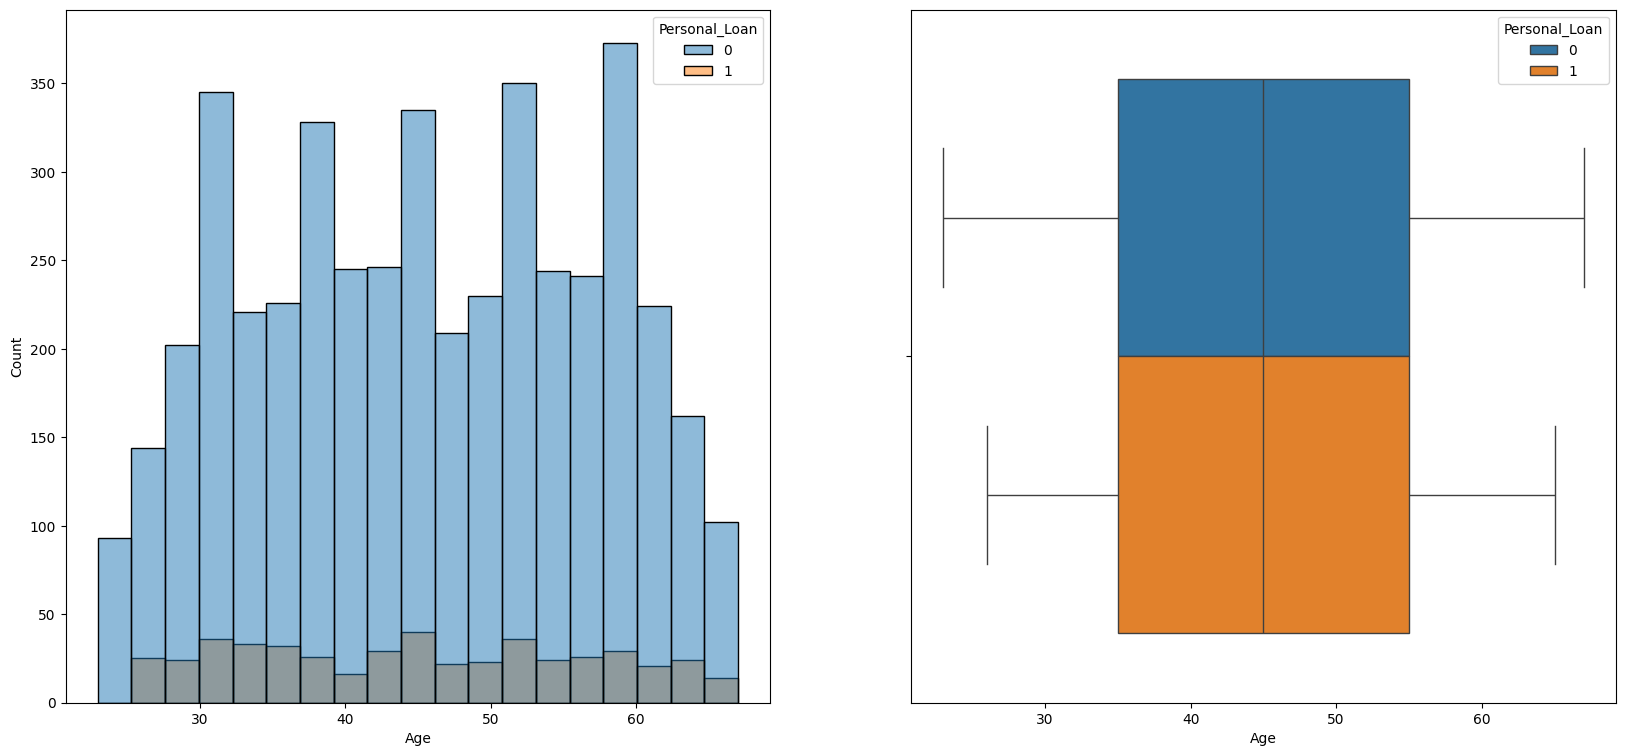

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,9))
sns.histplot(df, x="Age", hue="Personal_Loan", ax=axes[0])
sns.boxplot(df, x="Age", hue="Personal_Loan", ax=axes[1]);

### *5. How does a customer's interest in purchasing a loan vary with their education?*

#### **Observations:**
Based on their education, it's more probable a person that have a **Profissional** or **Advanced** Education be interested in purchasing a **Personal Loan**, as show the plot below.

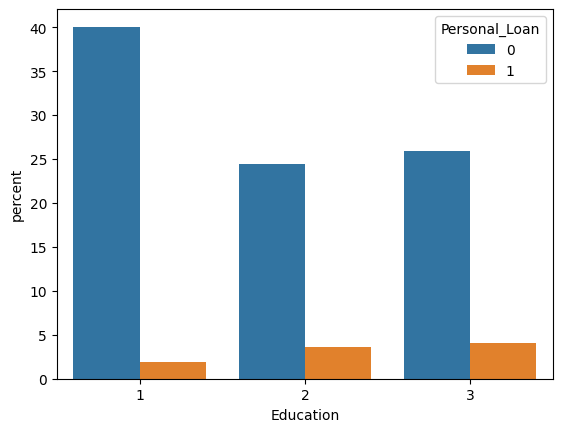

In [ ]:
sns.countplot(df, x="Education", stat="percent", hue="Personal_Loan");

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___